In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz, simps #Importing trapz, and simps module from scipy for numerical integration


Individual PMF data is saved in .xvg file, while diffusion data is saved in .txt file like in this case - Free energy of DIDP is in 3-DIDP.xvg, and its diffusion is in DIDP_dif.txt. Here, we have imported these data in a panda dataframe which simplifies our work.

In [4]:
pmf_didp = pd.read_csv('3-DIDP.xvg', header = None, delim_whitespace=True)

In [5]:
# Checking the few data from pmf_didp
pmf_didp.head()

,0,1,2
0,0.005053,-48.41069,1.186051
1,0.015159,-48.40821,1.185071
2,0.025265,-48.43615,1.184660
3,0.035372,-48.42865,1.184493
4,0.045478,-48.42352,1.184311


In [6]:
# Similarly, looking at few last lines of the data
pmf_didp.tail()

,0,1,2
416,4.209232,-0.388307,0.067237
417,4.219339,-0.391381,0.068446
418,4.229445,-2.450638,0.069256
419,4.239551,-6.310183,0.069774
420,4.249657,-7.762812,0.070150


In [7]:
# Extrapolating for the data at 0
df = pd.DataFrame({0: [0.000000], 1: -48.41069, 2:1.186051})
df = df.append(pmf_didp)
df = df.reset_index(drop=True)

In [8]:
# Just making a copy to have same name as original
pmf_didp = df.copy(deep=True)

In [9]:
pmf_didp.head()

,0,1,2
0,0.000000,-48.41069,1.186051
1,0.005053,-48.41069,1.186051
2,0.015159,-48.40821,1.185071
3,0.025265,-48.43615,1.184660
4,0.035372,-48.42865,1.184493


In [10]:
pmf_didp.tail()

,0,1,2
417,4.209232,-0.388307,0.067237
418,4.219339,-0.391381,0.068446
419,4.229445,-2.450638,0.069256
420,4.239551,-6.310183,0.069774
421,4.249657,-7.762812,0.070150


In [11]:
# We don't want the values of z distance above 4, so
pmf_didp = pmf_didp[pmf_didp[0] <= 4.000000]

In [12]:
pmf_didp.tail()

,0,1,2
392,3.956577,-0.053162,0.072423
393,3.966684,-0.033063,0.068499
394,3.976790,-0.021286,0.065731
395,3.986896,-0.031156,0.065768
396,3.997002,-0.050533,0.066649


In [13]:
# Just extrapolating to have the same value in z = 4 nm as in z = 3.997002
pmf_didp = pmf_didp.append({0: 4.000000, 1: -0.050533, 2: 0.066649}, ignore_index = True)

In [14]:
pmf_didp.tail()

,0,1,2
393,3.966684,-0.033063,0.068499
394,3.976790,-0.021286,0.065731
395,3.986896,-0.031156,0.065768
396,3.997002,-0.050533,0.066649
397,4.000000,-0.050533,0.066649


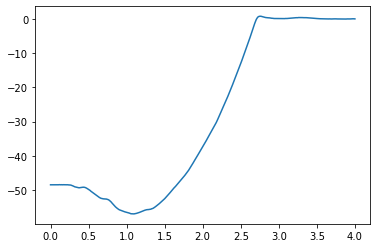

In [15]:
# Now, check a rough plot for free energy
plt.plot(pmf_didp[0], pmf_didp[1])

Now adding a $e^\frac{\Delta G}{RT}$ component in the last column of our PMF data. Here, $\Delta G$ is obtained from the second column pmf_dehp[1] and RT is 2.478 KJ/mol at 298K.

In [16]:
pmf_didp[3] = np.exp(pmf_didp[1]/2.478)

In [17]:
pmf_didp.head()

,0,1,2,3
0,0.000000,-48.41069,1.186051,3.277468e-09
1,0.005053,-48.41069,1.186051,3.277468e-09
2,0.015159,-48.40821,1.185071,3.280750e-09
3,0.025265,-48.43615,1.184660,3.243967e-09
4,0.035372,-48.42865,1.184493,3.253800e-09


In [18]:
# Just checking some values in the last column if it makes sense
np.exp(-48.41069/2.478)

3.2774684987476033e-09

Now, importing the diffusion coefficient data for DIDP........

In [19]:
diff_didp = pd.read_csv('DIDP_dif.txt', header = None, delim_whitespace=True)

In [20]:
diff_didp.head()

,0,1
0,0.0,5.807154e-07
1,0.1,7.846414e-07
2,0.2,1.311564e-08
3,0.3,2.334164e-08
4,0.4,2.294485e-07


In [21]:
diff_didp.tail()

,0,1
36,3.6,0.000006
37,3.7,0.000008
38,3.8,0.000009
39,3.9,0.000006
40,4.0,0.000011


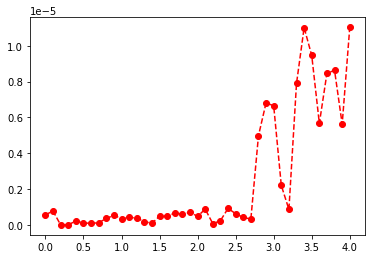

In [22]:
# Let's plot the data for diffusion coefficent of DIDP
plt.plot(diff_didp[0], diff_didp[1], '--o', color = 'r')

Here, the linear interpolation is done for our diffusion coefficient so that we can obtain the missing values at the position specified by the PMF data. The function takes these values **np.interp(The z-coordinates at which to evaluate the interpolated values, The z-coordinates of the data points, The function values of these data points)**

In [23]:
diffusion_interpl = np.interp(pmf_didp[0], diff_didp[0], diff_didp[1])

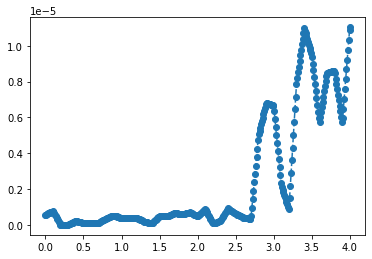

In [24]:
## Let's plot these interpolated values against the z - data points given by pmf_didp[0]
plt.plot(pmf_didp[0], diffusion_interpl, '--o')

The interpolation does makes sense as the two graphs looks like a spitting mirror images of one another. Now, let's make another dataframe with these interpolation data for diffusion coefficient.

In [25]:
diff_didp = pd.DataFrame({0: pmf_didp[0].copy(deep = True), 1 : diffusion_interpl})

In [26]:
diff_didp

,0,1
0,0.000000,5.807154e-07
1,0.005053,5.910200e-07
2,0.015159,6.116292e-07
3,0.025265,6.322384e-07
4,0.035372,6.528475e-07
...,...,...
393,3.966684,9.226884e-06
394,3.976790,9.772801e-06
395,3.986896,1.031872e-05
396,3.997002,1.086463e-05


#### My first approach for the numerical integration will be to convert the distance in z which are in nm into cm for both pmf as well as diffusion coefficient. 

In [27]:
# For pmf_dep it will be ---
pmf_didp[0] = pmf_didp[0] * 1 * 10 ** -7
pmf_didp.head()
# Here, the only columns we need to worry about is at the index 0 and 3 which are the values for z-distance in cm,
# exp(Delta G/RT)

,0,1,2,3
0,0.000000e+00,-48.41069,1.186051,3.277468e-09
1,5.053102e-10,-48.41069,1.186051,3.277468e-09
2,1.515930e-09,-48.40821,1.185071,3.280750e-09
3,2.526550e-09,-48.43615,1.184660,3.243967e-09
4,3.537170e-09,-48.42865,1.184493,3.253800e-09


In [28]:
# Similarly, for diffusion, it will be ....
diff_didp[0] = diff_didp[0] * 1 * 10 ** -7
diff_didp.head()
# Here, the two columns are the z-distance in cm, and Diffusion coefficient in cm^2/2

,0,1
0,0.000000e+00,5.807154e-07
1,5.053102e-10,5.910200e-07
2,1.515930e-09,6.116292e-07
3,2.526550e-09,6.322384e-07
4,3.537170e-09,6.528475e-07


In [29]:
# Now, we can perform numerical integration with either composite trapezoidal rule, or the simpson's rule

$$\int_{0}^{4 \times 10 ^{-7}} \frac{\exp\left ( \frac{\Delta G(z)}{RT} \right )}{D(z)} dz$$

In [30]:
#trapz(values of the function to integrate, sample points(z) corresponding to the function values, optional (dz)
#- spacing between the sample points(z))

In [31]:
integrand = pmf_didp[3]/diff_didp[1]

In [32]:
integrand

0           0.005644
1           0.005545
2           0.005364
3           0.005131
4           0.004984
           ...      
393    106942.507884
394    101449.628157
395     95700.432604
396     90183.802594
397     88859.247565
Length: 398, dtype: float64

Let's check some values of the integrand. For the first value at z = 0,

In [33]:
pmf_didp[1].to_numpy()[0]

-48.41069

In [34]:
diff_didp[1].to_numpy()[0]

5.8071544e-07

In [35]:
#Delta G = -48.41069, RT = 2.478, D(z) = 5.8071544e-07 cm^2/s
np.exp(-48.41069/2.478)/5.8071544e-07

0.0056438459751433565

In [36]:
integrand[0] # We get same values both manually and with dataframe

0.0056438459751433565

In [37]:
# Now, let's check at z = 4 nm or 4 e -7 cm
pmf_didp[1].to_numpy()[-1] # Delta G

-0.050533

In [38]:
diff_didp[1].to_numpy()[-1] # Diffusion coefficient

1.1026583e-05

In [39]:
# Delta G = -0.050533, RT = 2.478, D(z) = 1.1026583e-05 cm^2/s
np.exp(-0.050533/2.478)/1.1026583e-05

88859.24756467991

In [41]:
integrand[397] #Note: We haven't extrapolated the Delta G to be 0 at 4.00 nm. Same as expected

88859.24756467991

In [42]:
trapz(integrand, pmf_didp[0])

0.04100591269008171

In [43]:
# The permeability will be 1/integral
1/trapz(integrand, pmf_didp[0])

24.38672704489942

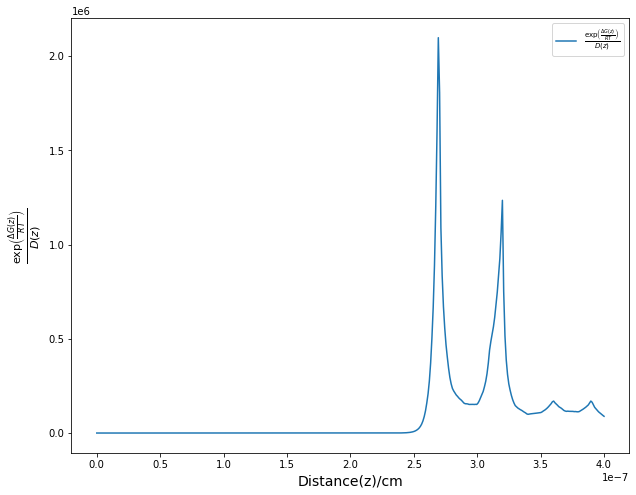

In [47]:
# Let's look at the plot of the integrand
plt.figure(figsize = (10,8))
plt.plot(pmf_didp[0], integrand, label = r'$\frac{\exp\left ( \frac{\Delta G(z)}{RT} \right )}{D(z)}$')
plt.xlabel('Distance(z)/cm', fontsize = 14)
plt.ylabel(r'$\frac{\exp\left ( \frac{\Delta G(z)}{RT} \right )}{D(z)}$', fontsize = 16)
plt.legend()

### Using Simpson's method:

In [48]:
simps(integrand, pmf_didp[0])

0.04100631874378352

In [51]:
# permeability will be
1/simps(integrand, pmf_didp[0]) # Not much of a difference

24.386485562096404

#### My another approach for the numerical integration will be to convert diffusion coefficient (cm^2/s) into nm^2/s, integrate it over the distance in nm, and finally convert into cm/s

In [52]:
# Our both pmf and diffusion data
pmf_didp.head()

,0,1,2,3
0,0.000000e+00,-48.41069,1.186051,3.277468e-09
1,5.053102e-10,-48.41069,1.186051,3.277468e-09
2,1.515930e-09,-48.40821,1.185071,3.280750e-09
3,2.526550e-09,-48.43615,1.184660,3.243967e-09
4,3.537170e-09,-48.42865,1.184493,3.253800e-09


In [53]:
diff_didp.head()

,0,1
0,0.000000e+00,5.807154e-07
1,5.053102e-10,5.910200e-07
2,1.515930e-09,6.116292e-07
3,2.526550e-09,6.322384e-07
4,3.537170e-09,6.528475e-07


In [54]:
# Let's convert the distance in both which are in cm back into nm, and also add another column in diffusion data 
# so that the coefficients are now converted into nm^2/s

In [55]:
pmf_didp[0] = pmf_didp[0] * 1 * 10 ** 7
diff_didp[0] = diff_didp[0] * 1 * 10 ** 7

In [56]:
# Let's check
pmf_didp.head()

,0,1,2,3
0,0.000000,-48.41069,1.186051,3.277468e-09
1,0.005053,-48.41069,1.186051,3.277468e-09
2,0.015159,-48.40821,1.185071,3.280750e-09
3,0.025265,-48.43615,1.184660,3.243967e-09
4,0.035372,-48.42865,1.184493,3.253800e-09


In [57]:
diff_didp.head()

,0,1
0,0.000000,5.807154e-07
1,0.005053,5.910200e-07
2,0.015159,6.116292e-07
3,0.025265,6.322384e-07
4,0.035372,6.528475e-07


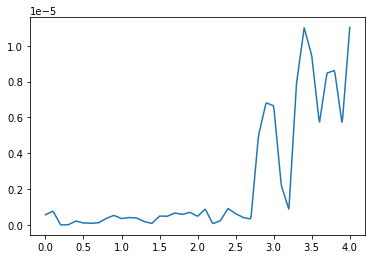

In [58]:
# Plotting both these two
plt.plot(diff_didp[0], diff_didp[1])

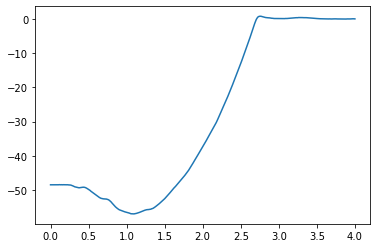

In [59]:
plt.plot(pmf_didp[0], pmf_didp[1])

In [60]:
# Converting diffusion coefficient into nm^2/s and adding it into the last column
diff_didp[2] = diff_didp[1] * 1 * 10 ** 14

In [62]:
diff_didp.head()

,0,1,2
0,0.000000,5.807154e-07,5.807154e+07
1,0.005053,5.910200e-07,5.910200e+07
2,0.015159,6.116292e-07,6.116292e+07
3,0.025265,6.322384e-07,6.322384e+07
4,0.035372,6.528475e-07,6.528475e+07


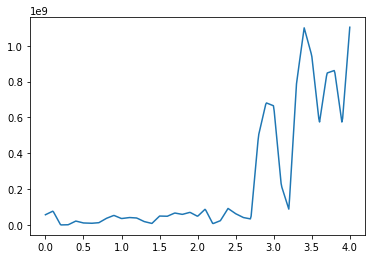

In [63]:
# Again, plotting to check
plt.plot(diff_didp[0], diff_didp[2])

In [64]:
pmf_didp.head()

,0,1,2,3
0,0.000000,-48.41069,1.186051,3.277468e-09
1,0.005053,-48.41069,1.186051,3.277468e-09
2,0.015159,-48.40821,1.185071,3.280750e-09
3,0.025265,-48.43615,1.184660,3.243967e-09
4,0.035372,-48.42865,1.184493,3.253800e-09


In [65]:
integrand = pmf_didp[3]/diff_didp[2]

In [66]:
integrand

0      5.643846e-17
1      5.545444e-17
2      5.363953e-17
3      5.130924e-17
4      4.984012e-17
           ...     
393    1.069425e-09
394    1.014496e-09
395    9.570043e-10
396    9.018380e-10
397    8.885925e-10
Length: 398, dtype: float64

In [67]:
trapz(integrand, pmf_didp[0])

4.100591269008173e-09

In [68]:
1/trapz(integrand, pmf_didp[0]) # This is now in nm/s

243867270.44899407

In [69]:
# Converting into cm/s
1/trapz(integrand, pmf_didp[0]) * 1 * 10 ** -7

24.386727044899406

In [70]:
# So, both the methods I have mentioned in here fetches us the same result

In [71]:
1/simps(integrand, pmf_didp[0]) * 1 * 10 ** -7

24.386485562096386